In [46]:
import csv
file = open('match_results.tsv', 'r')
file.readline()

reader = csv.reader(file, delimiter='\t')
import numpy as np
# total per source
rows = 0
concept_id = np.array([0,0,0,0])
primary_labels = np.array([0, 0, 0, 0])
aliases = np.array([0, 0, 0, 0])
no_match = np.array([0, 0, 0, 0])
general_match_counts = np.array([0,0,0,0,0])
for row in reader:
    rows += 1

    row_matches = 0

    for i in range(1, 5):
        if row[i] == "MatchType.CONCEPT_ID":
            row_matches += 1
            concept_id[i - 1] += 1
        elif row[i] == "MatchType.PRIMARY_LABEL":
            row_matches += 1
            primary_labels[i - 1] += 1
        elif row[i] == "MatchType.ALIAS":
            row_matches += 1
            aliases[i - 1] += 1
        elif row[i] == "MatchType.NO_MATCH":
            no_match[i - 1] += 1
        else:
            raise Exception
    general_match_counts[row_matches] += 1

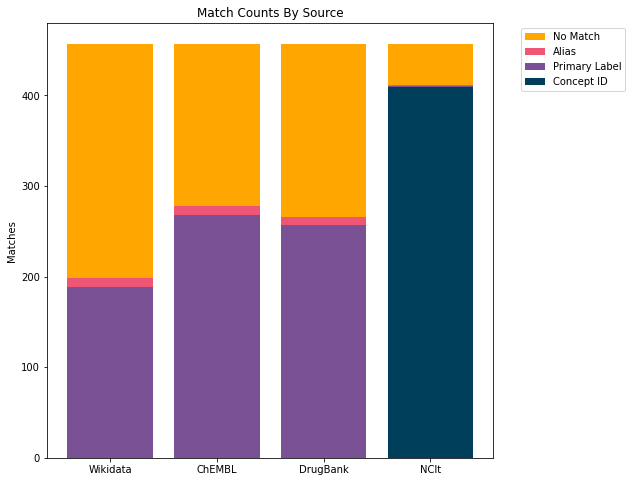

In [58]:
import matplotlib.pyplot as plt
labels = ['Wikidata', 'ChEMBL', 'DrugBank', 'NCIt']
indices = [i for i,_ in enumerate(labels)]
fig = plt.figure(figsize=(8, 8))

p1 = plt.bar(indices, no_match, label='no_match', color='#ffa600', bottom=primary_labels+aliases+concept_id)
p2 = plt.bar(indices, aliases, label='aliases', color='#ef5675', bottom=primary_labels+concept_id)
p3 = plt.bar(indices, primary_labels, label='primary_labels', color='#7a5195', bottom=concept_id)
p4 = plt.bar(indices, concept_id, label='concept_id', color='#003f5c')
plt.ylabel('Matches')
plt.title('Match Counts By Source')
plt.xticks(indices, labels)
lgd = plt.legend((p1[0], p2[0], p3[0], p4[0]), ('No Match', 'Alias', 'Primary Label', 'Concept ID'), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('counts.png', facecolor='white', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


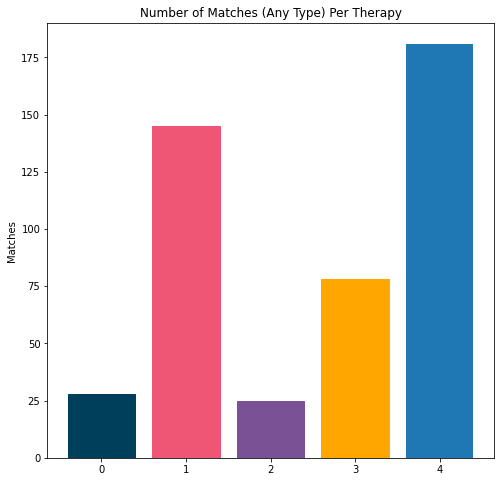

In [50]:
labels = ['0', '1', '2', '3', '4']
fig = plt.figure(figsize=(8, 8))
indices = [i for i,_ in enumerate(labels)]
p1 = plt.bar(indices, general_match_counts)
p1[0].set_color('#003f5c')
p1[1].set_color('#ef5675')
p1[2].set_color('#7a5195')
p1[3].set_color('#ffa600')
plt.xticks(indices, labels)
plt.ylabel('Matches')
plt.title('Number of Matches (Any Type) Per Therapy')
plt.savefig('counts_any_type.png', facecolor='white')
plt.show()
